<a href="https://colab.research.google.com/github/dawidmakowski-git/tensorflow_tutorials/blob/master/CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", header=None, 
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [7]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

0     7
1     6
2    14
3    16
4    13
Name: Age, dtype: int64

In [8]:
abalone_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300


In [9]:
abalone_labels.head()

0     7
1     6
2    14
3    16
4    13
Name: Age, dtype: int64

In [12]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [13]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [14]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 898us/step - loss: 59.9057
Epoch 2/10
104/104 [==============================] - 0s 869us/step - loss: 11.8415
Epoch 3/10
104/104 [==============================] - 0s 827us/step - loss: 8.8200
Epoch 4/10
104/104 [==============================] - 0s 863us/step - loss: 8.2810
Epoch 5/10
104/104 [==============================] - 0s 872us/step - loss: 7.7689
Epoch 6/10
104/104 [==============================] - 0s 830us/step - loss: 7.3525
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 7.0471
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 6.8321
Epoch 9/10
104/104 [==============================] - 0s 873us/step - loss: 6.6855
Epoch 10/10
104/104 [==============================] - 0s 900us/step - loss: 6.5808


# Bacic preprocessing

In [17]:
# Only use your training data to .adapt() preprocessing layers. 
# Do not use your validation or test data.

normalize = preprocessing.Normalization()

In [18]:
normalize.adapt(abalone_features)

In [19]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)


Epoch 1/10
104/104 [==============================] - 0s 959us/step - loss: 91.5453
Epoch 2/10
104/104 [==============================] - 0s 933us/step - loss: 52.0250
Epoch 3/10
104/104 [==============================] - 0s 914us/step - loss: 15.9552
Epoch 4/10
104/104 [==============================] - 0s 953us/step - loss: 5.7815
Epoch 5/10
104/104 [==============================] - 0s 845us/step - loss: 5.0200
Epoch 6/10
104/104 [==============================] - 0s 869us/step - loss: 4.9940
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0224
Epoch 8/10
104/104 [==============================] - 0s 933us/step - loss: 4.9897
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9487
Epoch 10/10
104/104 [==============================] - 0s 841us/step - loss: 4.9604


# Mixed data types

In [20]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [21]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [24]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'age': <tf.Tensor 'age:0' shape=(None, 1) dtype=float32>,
 'alone': <tf.Tensor 'alone:0' shape=(None, 1) dtype=string>,
 'class': <tf.Tensor 'class:0' shape=(None, 1) dtype=string>,
 'deck': <tf.Tensor 'deck:0' shape=(None, 1) dtype=string>,
 'embark_town': <tf.Tensor 'embark_town:0' shape=(None, 1) dtype=string>,
 'fare': <tf.Tensor 'fare:0' shape=(None, 1) dtype=float32>,
 'n_siblings_spouses': <tf.Tensor 'n_siblings_spouses:0' shape=(None, 1) dtype=float32>,
 'parch': <tf.Tensor 'parch:0' shape=(None, 1) dtype=float32>,
 'sex': <tf.Tensor 'sex:0' shape=(None, 1) dtype=string>}

In [26]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<tf.Tensor 'normalization_3/truediv:0' shape=(None, 4) dtype=float32>

In [27]:
preprocessed_inputs = [all_numeric_inputs]

In [28]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

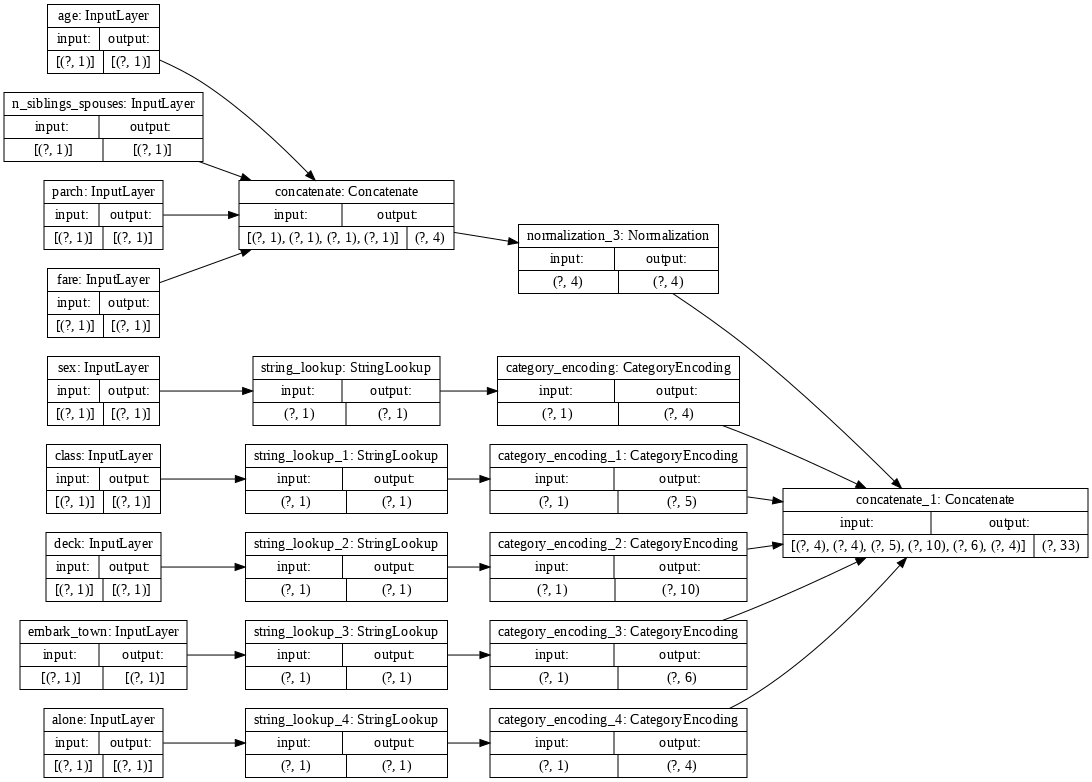

In [29]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [30]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [31]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ]], dtype=float32)>

In [32]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [33]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5978
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5197
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4807
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4585
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4443
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4351
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4297
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4251
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4235
Epoch 10/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4216


In [34]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: test/assets


In [35]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.939]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.939]], shape=(1, 1), dtype=float32)


# Using tf.data

In [36]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [37]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [38]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [39]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'
